In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
#outputs visual plots (histograms)
%matplotlib inline

#calls in all imports necessary
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import csv as csv
import statsmodels.formula.api as smf

pd.options.display.max_columns = 150
pd.options.display.float_format='{:,.2f}'.format

import sys

#sets paths to import the methods below
sys.path.append('C:\Workspace\SOURCE\sf_taxi\sfdata_wrangler')
sys.path.append('C:\SOURCE\Path_inf_filter\mm\path_inference')
sys.path.append('C:\SOURCE\dta')
sys.path.append('C:\SOURCE\Path_inf_filter')
sys.path.append('C:/Workspace/gtabview-0.8')

#calls in python methods
from TaxiDataHelper import TaxiDataHelper
#from DataFrameViewer import DataFrameViewer
from mm.path_inference import utils
from gtabview import view
import seaborn as sns
sns.set(color_codes=True)

sftaxiHelper = TaxiDataHelper()
#viewer = DataFrameViewer()

In [2]:
# eventually convert filenames to arguments
hdffile = "E:/Transit_Casa/Output/sfmuni_monthly_ts.h5"
store = pd.HDFStore(hdffile)
store

<class 'pandas.io.pytables.HDFStore'>
File path: E:/Transit_Casa/Output/sfmuni_monthly_ts.h5
/rs_day                  frame_table  (typ->appendable,nrows->301137,ncols->57,indexers->[index],dc->[MONTH,DOW,AGENCY_ID,ROUTE_SHORT_NAME,DIR,SEQ,NUMDAYS,OBSDAYS,TRIP_STOPS,OBS_TRIP_STOPS,WGT_TRIP_STOPS,STOP_ID,ROUTE_LONG_NAME,ROUTE_TYPE,TRIP_HEADSIGN,HEADWAY_S,FARE,STOPNAME,STOPNAME_AVL,STOP_LAT,STOP_LON,EOL,SOL,TIMEPOINT,ARRIVAL_TIME_DEV,DEPARTURE_TIME_DEV,DWELL_S,DWELL,RUNTIME_S,RUNTIME,TOTTIME_S,TOTTIME,SERVMILES_S,SERVMILES,RUNSPEED_S,RUNSPEED,TOTSPEED_S,TOTSPEED,ONTIME5,ON,OFF,LOAD_ARR,LOAD_DEP,PASSMILES,PASSHOURS,WAITHOURS,FULLFARE_REV,PASSDELAY_DEP,PASSDELAY_ARR,RDBRDNGS,DOORCYCLES,WHEELCHAIR,BIKERACK,CAPACITY,VC,CROWDED,CROWDHOURS])     
/rs_tod                  frame_table  (typ->appendable,nrows->1565864,ncols->58,indexers->[index],dc->[MONTH,DOW,TOD,AGENCY_ID,ROUTE_SHORT_NAME,DIR,SEQ,NUMDAYS,OBSDAYS,TRIP_STOPS,OBS_TRIP_STOPS,WGT_TRIP_STOPS,STOP_ID,ROUTE_LONG_NAME,ROUTE_TYPE,TRIP_HE

In [16]:
df['stop'] = pd.concat([df['DOW'].dropna(), df['TOD'].dropna(), df['AGENCY_ID'].dropna(), df['ROUTE_SHORT_NAME'].dropna(), df['DIR'].dropna(), df['SEQ'].dropna()])

ValueError: cannot reindex from a duplicate axis

In [20]:
for row in df:
    df['stop'] = df['DOW']
    df['stop'] = df['stop'].append(df['TOD'])

ValueError: cannot reindex from a duplicate axis

In [5]:
df = store.get('rs_tod')

In [12]:
df.head()

,MONTH,DOW,TOD,AGENCY_ID,ROUTE_SHORT_NAME,DIR,SEQ,NUMDAYS,OBSDAYS,TRIP_STOPS,OBS_TRIP_STOPS,WGT_TRIP_STOPS,STOP_ID,ROUTE_LONG_NAME,ROUTE_TYPE,TRIP_HEADSIGN,HEADWAY_S,FARE,STOPNAME,STOPNAME_AVL,STOP_LAT,STOP_LON,EOL,SOL,TIMEPOINT,ARRIVAL_TIME_DEV,DEPARTURE_TIME_DEV,DWELL_S,DWELL,RUNTIME_S,RUNTIME,TOTTIME_S,TOTTIME,SERVMILES_S,SERVMILES,RUNSPEED_S,RUNSPEED,TOTSPEED_S,TOTSPEED,ONTIME5,ON,OFF,LOAD_ARR,LOAD_DEP,PASSMILES,PASSHOURS,WAITHOURS,FULLFARE_REV,PASSDELAY_DEP,PASSDELAY_ARR,RDBRDNGS,DOORCYCLES,WHEELCHAIR,BIKERACK,CAPACITY,VC,CROWDED,CROWDHOURS
0,2009-06-01,1,0300-0559,SFMTA,1,0,1,12,6,2,0,2.81,5056,CALIFORNIA,3,Geary & 33rd Av.,30.00,2.00,Howard St & Main St,HOWARD ST&MAIN ST E-NS/BZ,37.79,-122.39,0,1,1.00,-2.59,-1.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.67,4.12,0.00,1.30,5.42,0.00,0.00,0.77,8.24,0.00,0.00,0.00,6.76,0.00,0.00,73.50,0.01,0.00,0.00
1,2009-06-01,1,0300-0559,SFMTA,1,0,2,12,6,2,0,2.81,5336,CALIFORNIA,3,Geary & 33rd Av.,30.00,2.00,Main St & Market St,MAIN ST&MARKET ST NE-MB/B,37.79,-122.40,0,0,0.00,-0.19,0.46,0.00,1.83,4.24,9.30,4.24,11.13,0.38,0.54,5.41,3.46,5.41,2.89,1.00,1.16,0.70,5.42,5.88,1.04,0.42,0.26,2.32,3.55,0.67,0.00,1.62,0.00,0.00,73.50,0.03,0.00,0.00
2,2009-06-01,1,0300-0559,SFMTA,1,0,3,12,6,2,0,2.81,4445,CALIFORNIA,3,Geary & 33rd Av.,30.00,2.00,Drumm St & California St,DRUMM ST&CALIFORNIA ST NE,37.79,-122.40,0,0,0.00,-0.13,0.76,0.00,2.40,2.76,2.34,2.76,4.75,0.25,0.35,5.48,9.06,5.48,4.48,0.92,16.42,0.23,5.88,22.07,0.74,0.38,2.66,32.84,18.87,13.91,0.00,6.90,0.00,0.00,73.50,0.03,0.00,0.00
3,2009-06-01,1,0300-0559,SFMTA,1,0,5,12,6,2,0,2.81,6294,CALIFORNIA,3,Geary & 33rd Av.,30.00,2.00,Sacramento St & Davis St,SACRAMENTO ST&DAVIS ST NE,37.79,-122.40,0,0,0.00,0.43,0.55,0.00,0.25,2.20,2.18,2.20,2.43,0.20,0.28,5.40,7.67,5.40,6.88,0.92,0.67,0.00,22.07,22.74,2.19,0.29,0.25,1.33,0.45,0.07,0.00,1.46,0.00,0.00,73.50,0.12,0.00,0.00
4,2009-06-01,1,0300-0559,SFMTA,1,0,6,12,6,2,0,2.81,6290,CALIFORNIA,3,Geary & 33rd Av.,30.00,2.00,Sacramento St & Battery St,SACRAMENTO ST&BATTERY ST,37.79,-122.40,0,0,0.00,-0.25,-0.15,0.00,0.27,3.10,2.12,3.10,2.40,0.29,0.40,5.54,11.37,5.54,10.06,0.58,2.48,0.33,22.74,24.89,3.25,0.34,0.73,4.96,0.00,0.00,0.00,3.68,0.00,0.00,73.50,0.13,0.00,0.00


In [13]:
df.MONTH.unique()

array(['2009-06-01T00:00:00.000000000', '2009-07-01T00:00:00.000000000',
       '2009-08-01T00:00:00.000000000', '2009-09-01T00:00:00.000000000',
       '2009-10-01T00:00:00.000000000', '2009-11-01T00:00:00.000000000',
       '2009-12-01T00:00:00.000000000', '2010-01-01T00:00:00.000000000',
       '2010-02-01T00:00:00.000000000', '2010-03-01T00:00:00.000000000',
       '2010-05-01T00:00:00.000000000', '2010-06-01T00:00:00.000000000',
       '2010-07-01T00:00:00.000000000', '2010-08-01T00:00:00.000000000',
       '2010-09-01T00:00:00.000000000', '2010-10-01T00:00:00.000000000',
       '2010-11-01T00:00:00.000000000', '2010-12-01T00:00:00.000000000',
       '2011-01-01T00:00:00.000000000', '2011-02-01T00:00:00.000000000',
       '2011-03-01T00:00:00.000000000', '2011-04-01T00:00:00.000000000',
       '2011-05-01T00:00:00.000000000', '2011-06-01T00:00:00.000000000',
       '2011-07-01T00:00:00.000000000', '2011-08-01T00:00:00.000000000',
       '2011-09-01T00:00:00.000000000', '2011-10-01

In [9]:
df_tod1 = df[df['TOD'] == '0300-0559']
df_tod1_sep09 = df_tod1[df_tod1['MONTH'] == '2009-09-01T00:00:00.000000000'] 
df_tod1_sep13 = df_tod1[df_tod1['MONTH'] ==  '2013-09-01T00:00:00.000000000'] 
print(df_tod1_sep09.ON.sum())
print(df_tod1_sep13.ON.sum())

6434.463644709924
5948.815345243654


In [10]:
df_tod2 = df[df['TOD'] == '0600-0859']
df_tod2_sep09 = df_tod2[df_tod2['MONTH'] == '2009-09-01T00:00:00.000000000'] 
df_tod2_sep13 = df_tod2[df_tod2['MONTH'] == '2013-09-01T00:00:00.000000000'] 
print(df_tod2_sep09.ON.sum())
print(df_tod2_sep13.ON.sum())

111064.70517660432
98782.34813516875


In [11]:
df_tod3 = df[df['TOD'] == '0900-1359']
df_tod3_sep09 = df_tod3[df_tod3['MONTH'] == '2009-09-01T00:00:00.000000000'] 
df_tod3_sep13 = df_tod3[df_tod3['MONTH'] == '2013-09-01T00:00:00.000000000'] 
print(df_tod3_sep09.ON.sum())
print(df_tod3_sep13.ON.sum())

158553.23397268602
138325.2003159002


In [12]:
df_tod4 = df[df['TOD'] == '1400-1559']
df_tod4_sep09 = df_tod4[df_tod4['MONTH'] == '2009-09-01T00:00:00.000000000'] 
df_tod4_sep13 = df_tod4[df_tod4['MONTH'] == '2013-10-01T00:00:00.000000000'] 
print(df_tod4_sep09.ON.sum())
print(df_tod4_sep13.ON.sum())

88169.33881833208
77845.53794192967


In [13]:
df_tod5 = df[df['TOD'] == '1600-1859']
df_tod5_sep09 = df_tod5[df_tod5['MONTH'] == '2009-09-01T00:00:00.000000000'] 
df_tod5_sep13 = df_tod5[df_tod5['MONTH'] == '2013-09-01T00:00:00.000000000'] 
print(df_tod5_sep09.ON.sum())
print(df_tod5_sep13.ON.sum())

122190.92307655036
111712.52059548425


In [14]:
df_tod6 = df[df['TOD'] == '1900-2159']
df_tod6_sep09 = df_tod6[df_tod6['MONTH'] == '2009-09-01T00:00:00.000000000'] 
df_tod6_sep13 = df_tod6[df_tod6['MONTH'] == '2013-09-01T00:00:00.000000000'] 
print(df_tod6_sep09.ON.sum())
print(df_tod6_sep13.ON.sum())

38678.4896246548
40161.776816928585


In [15]:
df_tod7 = df[df['TOD'] == '2200-0259']
df_tod7_sep09 = df_tod7[df_tod7['MONTH'] == '2009-09-01T00:00:00.000000000'] 
df_tod7_sep13 = df_tod7[df_tod7['MONTH'] == '2013-09-01T00:00:00.000000000'] 
print(df_tod7_sep09.ON.sum())
print(df_tod7_sep13.ON.sum())

df_tod7_sep09.head()


20020.31544104267
18170.567644864837


,MONTH,DOW,TOD,AGENCY_ID,ROUTE_SHORT_NAME,DIR,SEQ,NUMDAYS,OBSDAYS,TRIP_STOPS,OBS_TRIP_STOPS,WGT_TRIP_STOPS,STOP_ID,ROUTE_LONG_NAME,ROUTE_TYPE,TRIP_HEADSIGN,HEADWAY_S,FARE,STOPNAME,STOPNAME_AVL,STOP_LAT,STOP_LON,EOL,SOL,TIMEPOINT,ARRIVAL_TIME_DEV,DEPARTURE_TIME_DEV,DWELL_S,DWELL,RUNTIME_S,RUNTIME,TOTTIME_S,TOTTIME,SERVMILES_S,SERVMILES,RUNSPEED_S,RUNSPEED,TOTSPEED_S,TOTSPEED,ONTIME5,ON,OFF,LOAD_ARR,LOAD_DEP,PASSMILES,PASSHOURS,WAITHOURS,FULLFARE_REV,PASSDELAY_DEP,PASSDELAY_ARR,RDBRDNGS,DOORCYCLES,WHEELCHAIR,BIKERACK,CAPACITY,VC,CROWDED,CROWDHOURS
122537,2009-09-01,1,2200-0259,SFMTA,1,0,4,22,14,13,2,13.00,4015,CALIFORNIA,3,Geary & 33rd Av.,19.00,2.00,Clay St & Drumm St,CLAY ST&DRUMM ST SW-NS/BZ,37.80,-122.40,0,1,1.00,-4.68,-0.47,0.00,54.72,0.00,0.00,0.00,54.72,0.00,0.00,0.00,0.00,0.00,0.00,0.66,26.08,0.00,4.18,30.26,0.00,2.16,3.80,52.15,31.51,16.36,0.31,31.65,0.00,0.00,243.00,0.01,0.00,0.00
122538,2009-09-01,1,2200-0259,SFMTA,1,0,5,22,14,13,2,13.00,6294,CALIFORNIA,3,Geary & 33rd Av.,18.97,2.00,Sacramento St & Davis St,SACRAMENTO ST&DAVIS ST NE,37.79,-122.40,0,0,0.00,-0.20,0.35,0.00,7.10,11.65,15.56,11.65,22.66,1.55,1.55,7.97,5.96,7.97,4.10,0.74,68.56,2.09,30.72,97.19,3.66,1.86,9.89,137.12,137.97,94.42,0.00,24.38,0.00,0.62,243.00,0.04,0.00,0.00
122539,2009-09-01,1,2200-0259,SFMTA,1,0,6,22,14,13,2,13.00,6290,CALIFORNIA,3,Geary & 33rd Av.,18.94,2.00,Sacramento St & Battery St,SACRAMENTO ST&BATTERY ST,37.79,-122.40,0,0,0.00,0.23,0.39,0.00,2.11,12.50,11.24,12.50,13.35,1.86,1.86,8.92,9.92,8.92,8.36,0.75,22.52,0.85,97.19,118.86,13.90,1.82,3.41,45.04,28.41,23.79,0.00,16.56,0.00,0.62,243.00,0.12,0.00,0.00
122540,2009-09-01,1,2200-0259,SFMTA,1,0,7,22,14,13,2,13.00,6314,CALIFORNIA,3,Geary & 33rd Av.,18.92,2.00,Sacramento St & Sansome St,SACRAMENTO ST&SANSOME ST,37.79,-122.40,0,0,1.00,0.33,0.42,0.00,1.21,6.85,6.13,6.85,7.33,0.98,0.97,8.54,9.55,8.54,7.98,0.75,8.82,0.00,118.86,127.68,8.91,1.07,1.28,17.64,13.48,12.55,0.00,8.59,0.00,0.39,243.00,0.15,0.00,0.00
122541,2009-09-01,1,2200-0259,SFMTA,1,0,8,22,14,13,2,13.00,6307,CALIFORNIA,3,Geary & 33rd Av.,18.89,2.00,Sacramento St & Montgomery St,SACRAMENTO ST&MONTGOMERY,37.79,-122.40,0,0,0.00,0.20,0.55,0.00,4.62,9.74,7.26,9.74,11.87,1.09,1.09,6.73,9.03,6.73,5.52,0.71,27.32,2.71,129.23,153.83,10.86,1.90,4.12,54.63,62.00,37.68,0.00,19.89,0.00,0.00,243.00,0.16,0.00,0.00


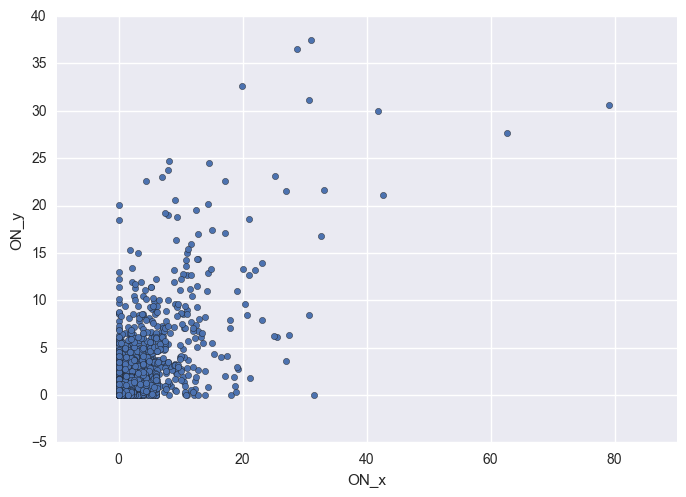

In [65]:
df_tod1_2 = df_tod1_sep09.merge(df_tod1_sep13, on = ['DOW','TOD','AGENCY_ID','ROUTE_SHORT_NAME','DIR','SEQ'])
df_tod1_2.plot.scatter(x = 'ON_x', y = 'ON_y')

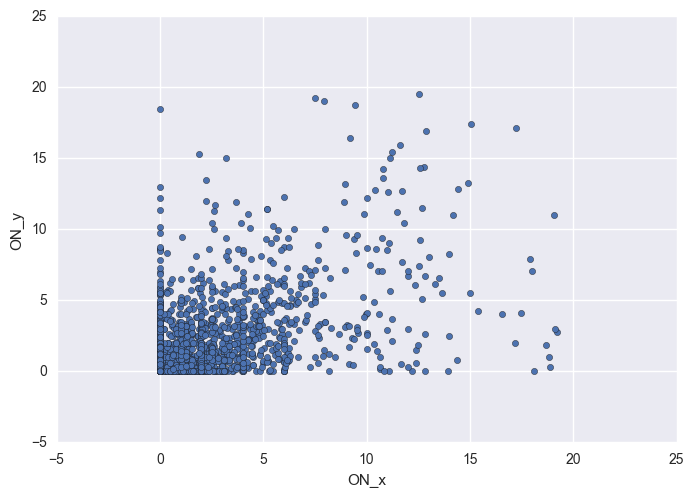

In [16]:
df_tod1_2 = df_tod1_sep09.merge(df_tod1_sep13, on = ['DOW','TOD','AGENCY_ID','ROUTE_SHORT_NAME','DIR','SEQ'])

df_tod1_2_clipped = df_tod1_2.loc[df_tod1_2['ON_x'] < 20]
df_tod1_2_clipped = df_tod1_2_clipped.loc[df_tod1_2['ON_y'] < 20]


df_tod1_2_clipped.plot.scatter(x = 'ON_x', y = 'ON_y')

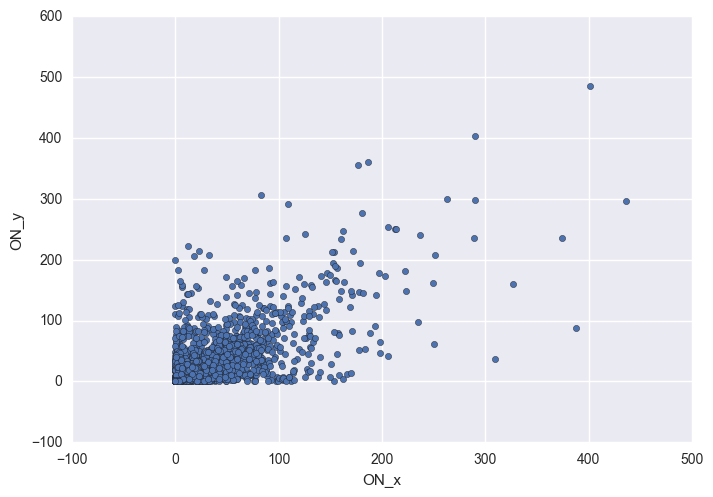

In [97]:
df_tod2_2 = df_tod2_sep09.merge(df_tod2_sep13, on = ['DOW','TOD','AGENCY_ID','ROUTE_SHORT_NAME','DIR','SEQ'])
df_tod2_2.plot.scatter(x = 'ON_x', y = 'ON_y')

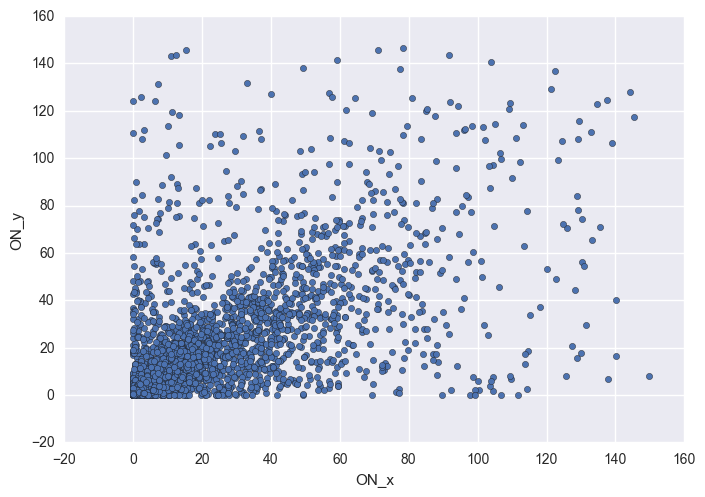

In [17]:
df_tod2_2 = df_tod2_sep09.merge(df_tod2_sep13, on = ['DOW','TOD','AGENCY_ID','ROUTE_SHORT_NAME','DIR','SEQ'])

df_tod2_2_clipped = df_tod2_2.loc[df_tod2_2['ON_x'] < 150]
df_tod2_2_clipped = df_tod2_2_clipped.loc[df_tod2_2['ON_y'] < 150]


df_tod2_2_clipped.plot.scatter(x = 'ON_x', y = 'ON_y')

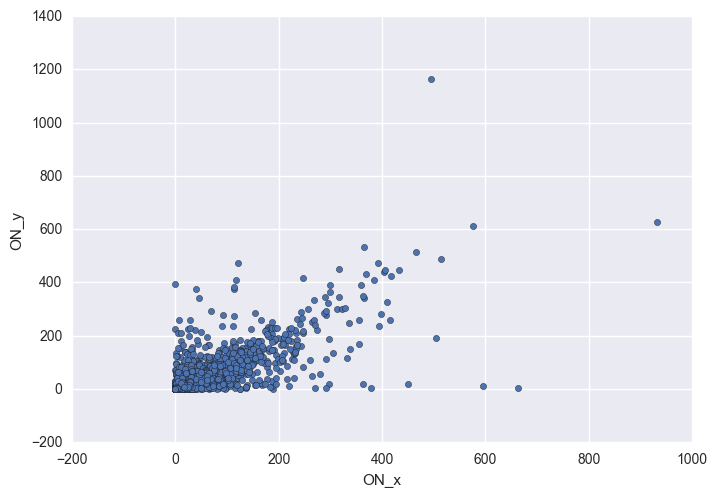

In [93]:
df_tod3_2 = df_tod3_sep09.merge(df_tod3_sep13, on = ['DOW','TOD','AGENCY_ID','ROUTE_SHORT_NAME','DIR','SEQ'])
df_tod3_2.plot.scatter(x = 'ON_x', y = 'ON_y')

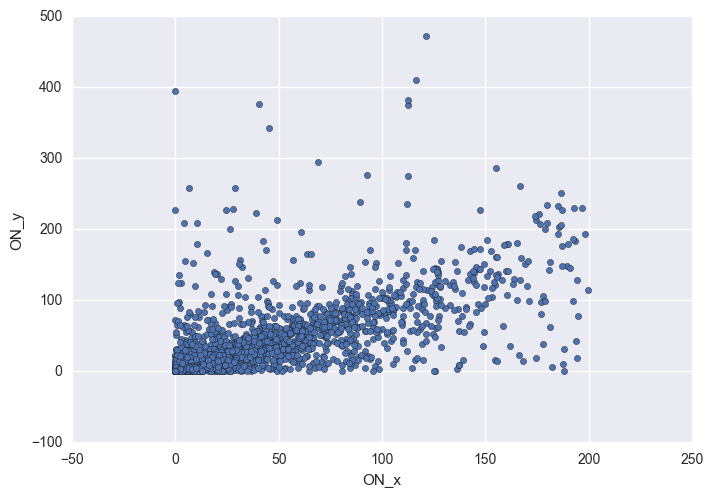

In [18]:
df_tod3_2 = df_tod3_sep09.merge(df_tod3_sep13, on = ['DOW','TOD','AGENCY_ID','ROUTE_SHORT_NAME','DIR','SEQ'])

df_tod3_2_clipped = df_tod3_2.loc[df_tod3_2['ON_x'] < 200]
df_tod3_2_clipped = df_tod3_2.loc[df_tod3_2['ON_x'] < 200]


df_tod3_2_clipped.plot.scatter(x = 'ON_x', y = 'ON_y')

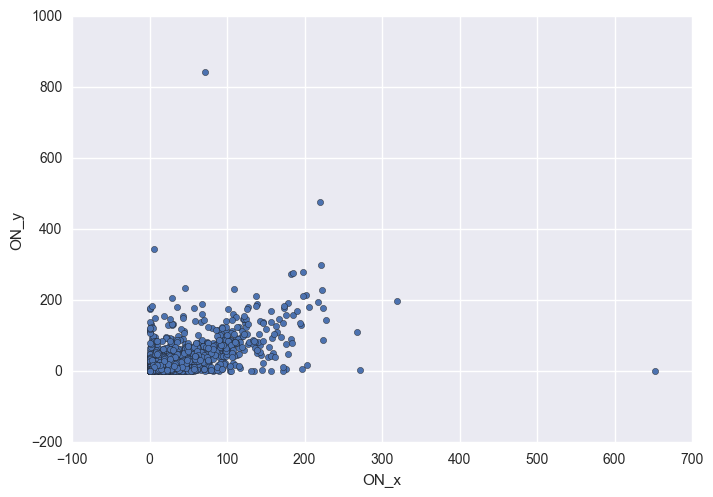

In [102]:
df_tod4_2 = df_tod4_sep09.merge(df_tod4_sep13, on = ['DOW','TOD','AGENCY_ID','ROUTE_SHORT_NAME','DIR','SEQ'])
df_tod4_2.plot.scatter(x = 'ON_x', y = 'ON_y')

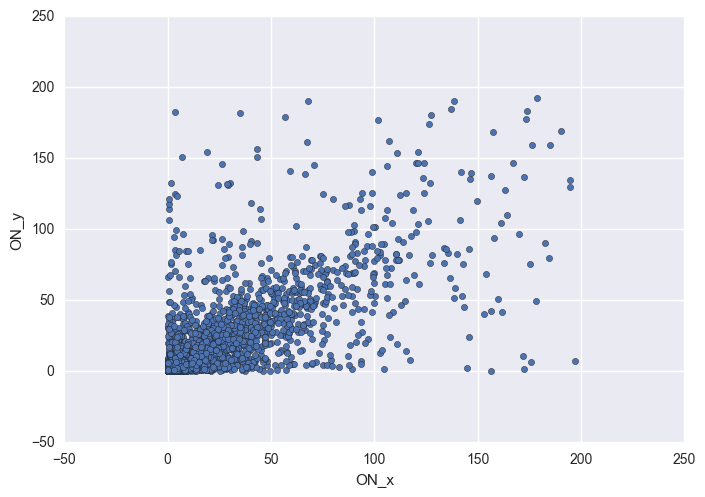

In [272]:
df_tod4_2 = df_tod4_sep09.merge(df_tod4_sep13, on = ['DOW','TOD','AGENCY_ID','ROUTE_SHORT_NAME','DIR','SEQ'])

df_tod4_2_clipped = df_tod4_2.loc[df_tod4_2['ON_x'] < 200]
df_tod4_2_clipped = df_tod4_2_clipped.loc[df_tod4_2['ON_y'] < 200]
df_tod4_2_clipped = df_tod4_2_clipped.loc[df_tod4_2['ON_x'] > 0]
df_tod4_2_clipped = df_tod4_2_clipped.loc[df_tod4_2['ON_y'] > 0]

df_tod4_2_clipped.plot.scatter(x = 'ON_x', y = 'ON_y')

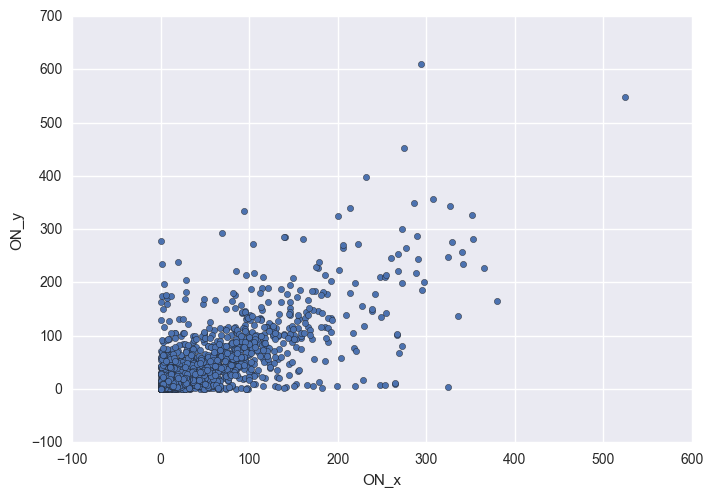

In [107]:
df_tod5_2 = df_tod5_sep09.merge(df_tod5_sep13, on = ['DOW','TOD','AGENCY_ID','ROUTE_SHORT_NAME','DIR','SEQ'])
df_tod5_2.plot.scatter(x = 'ON_x', y = 'ON_y')

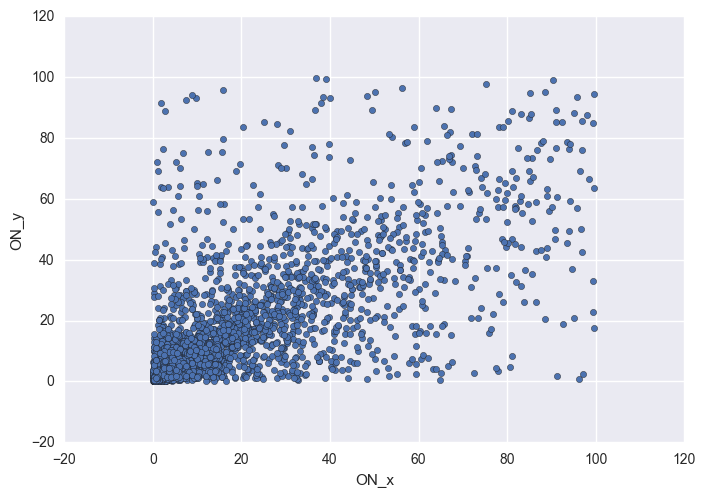

In [118]:
df_tod5_2 = df_tod5_sep09.merge(df_tod5_sep13, on = ['DOW','TOD','AGENCY_ID','ROUTE_SHORT_NAME','DIR','SEQ'])

df_tod5_2_clipped = df_tod5_2.loc[df_tod5_2['ON_x'] < 100]
df_tod5_2_clipped = df_tod5_2_clipped.loc[df_tod5_2['ON_y'] < 100]
df_tod5_2_clipped = df_tod5_2_clipped.loc[df_tod5_2['ON_x'] > 0]
df_tod5_2_clipped = df_tod5_2_clipped.loc[df_tod5_2['ON_y'] > 0]


df_tod5_2_clipped.plot.scatter(x = 'ON_x', y = 'ON_y')

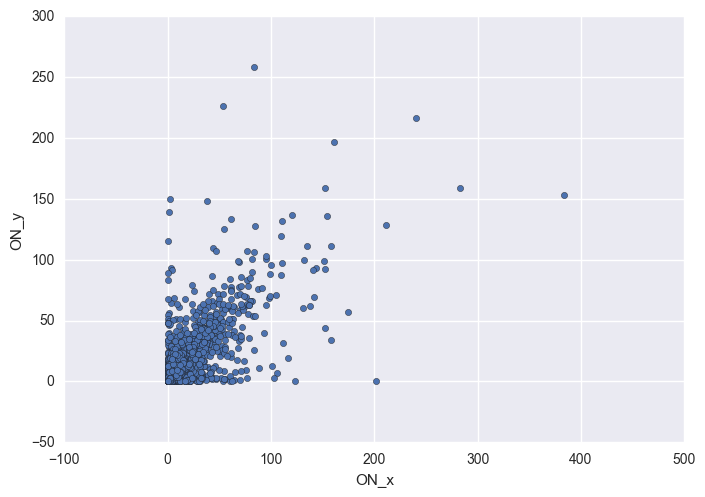

In [119]:
df_tod6_2 = df_tod6_sep09.merge(df_tod6_sep13, on = ['DOW','TOD','AGENCY_ID','ROUTE_SHORT_NAME','DIR','SEQ'])
df_tod6_2.plot.scatter(x = 'ON_x', y = 'ON_y')

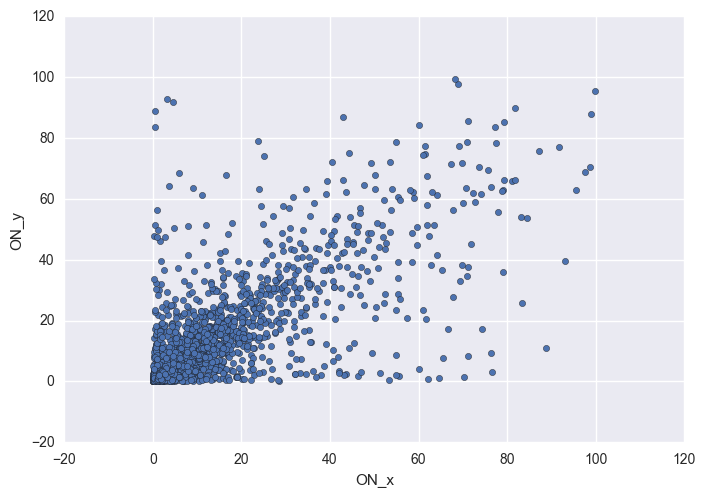

In [271]:
df_tod6_2 = df_tod6_sep09.merge(df_tod6_sep13, on = ['DOW','TOD','AGENCY_ID','ROUTE_SHORT_NAME','DIR','SEQ'])

df_tod6_2_clipped = df_tod6_2.loc[df_tod6_2['ON_x'] < 100]
df_tod6_2_clipped = df_tod6_2_clipped.loc[df_tod6_2['ON_y'] < 100]
df_tod6_2_clipped = df_tod6_2_clipped.loc[df_tod6_2['ON_x'] > 0]
df_tod6_2_clipped = df_tod6_2_clipped.loc[df_tod6_2['ON_y'] > 0]

df_tod6_2_clipped.plot.scatter(x = 'ON_x', y = 'ON_y')

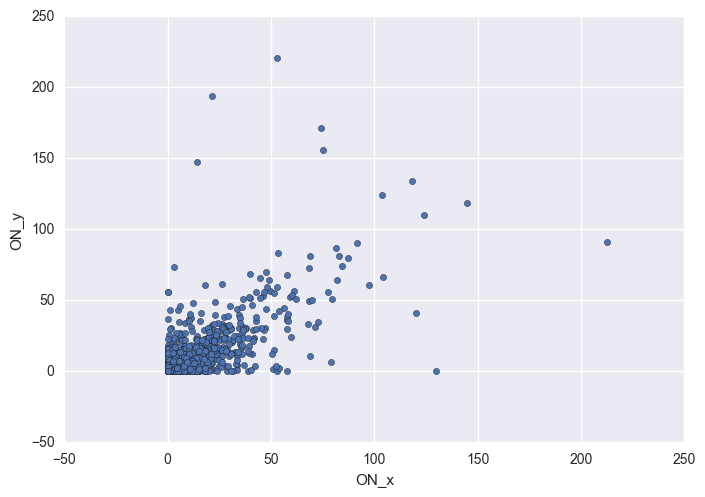

In [121]:
df_tod7_2 = df_tod7_sep09.merge(df_tod7_sep13, on = ['DOW','TOD','AGENCY_ID','ROUTE_SHORT_NAME','DIR','SEQ'])
df_tod7_2.plot.scatter(x = 'ON_x', y = 'ON_y')

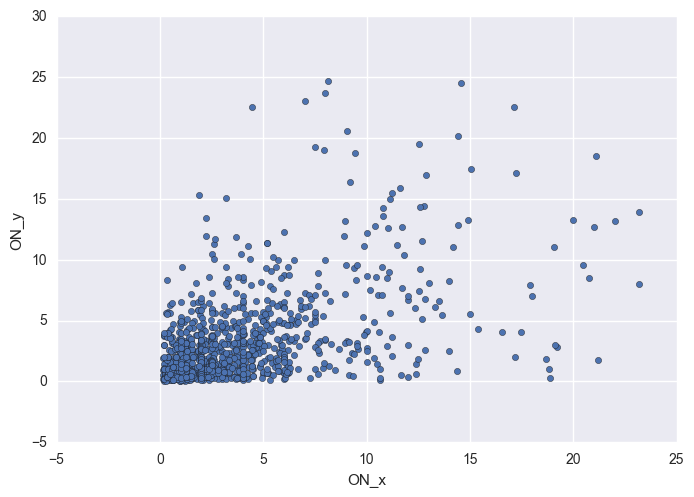

In [270]:
df_tod7_2 = df_tod1_sep09.merge(df_tod1_sep13, on = ['DOW','TOD','AGENCY_ID','ROUTE_SHORT_NAME','DIR','SEQ'])

df_tod7_2_clipped = df_tod7_2.loc[df_tod7_2['ON_x'] < 25]
df_tod7_2_clipped = df_tod7_2_clipped.loc[df_tod7_2['ON_y'] < 25]
df_tod7_2_clipped = df_tod7_2_clipped.loc[df_tod7_2['ON_x'] > 0]
df_tod7_2_clipped = df_tod7_2_clipped.loc[df_tod7_2['ON_y'] > 0]

df_tod7_2_clipped.plot.scatter(x = 'ON_x', y = 'ON_y')

In [42]:
df_tod7_2.head()

,MONTH_x,DOW_x,TOD_x,AGENCY_ID_x,ROUTE_SHORT_NAME_x,DIR_x,SEQ_x,NUMDAYS_x,OBSDAYS_x,TRIP_STOPS_x,OBS_TRIP_STOPS_x,WGT_TRIP_STOPS_x,STOP_ID_x,ROUTE_LONG_NAME_x,ROUTE_TYPE_x,TRIP_HEADSIGN_x,HEADWAY_S_x,FARE_x,STOPNAME,STOPNAME_AVL_x,STOP_LAT_x,STOP_LON_x,EOL_x,SOL_x,TIMEPOINT_x,ARRIVAL_TIME_DEV_x,DEPARTURE_TIME_DEV_x,DWELL_S_x,DWELL_x,RUNTIME_S_x,RUNTIME_x,TOTTIME_S_x,TOTTIME_x,SERVMILES_S_x,SERVMILES_x,RUNSPEED_S_x,RUNSPEED_x,TOTSPEED_S_x,TOTSPEED_x,ONTIME5_x,ON_x,OFF_x,LOAD_ARR_x,LOAD_DEP_x,PASSMILES_x,PASSHOURS_x,WAITHOURS_x,FULLFARE_REV_x,PASSDELAY_DEP_x,PASSDELAY_ARR_x,RDBRDNGS_x,DOORCYCLES_x,WHEELCHAIR_x,BIKERACK_x,CAPACITY_x,VC_x,CROWDED_x,CROWDHOURS_x,MONTH_y,DOW_y,TOD_y,AGENCY_ID_y,ROUTE_SHORT_NAME_y,DIR_y,SEQ_y,NUMDAYS_y,OBSDAYS_y,TRIP_STOPS_y,OBS_TRIP_STOPS_y,WGT_TRIP_STOPS_y,STOP_ID_y,ROUTE_LONG_NAME_y,ROUTE_TYPE_y,TRIP_HEADSIGN_y,HEADWAY_S_y,FARE_y,STOPNAME_AVL_y,STOP_LAT_y,STOP_LON_y,EOL_y,SOL_y,TIMEPOINT_y,ARRIVAL_TIME_DEV_y,DEPARTURE_TIME_DEV_y,DWELL_S_y,DWELL_y,RUNTIME_S_y,RUNTIME_y,TOTTIME_S_y,TOTTIME_y,SERVMILES_S_y,SERVMILES_y,RUNSPEED_S_y,RUNSPEED_y,TOTSPEED_S_y,TOTSPEED_y,ONTIME5_y,ON_y,OFF_y,LOAD_ARR_y,LOAD_DEP_y,PASSMILES_y,PASSHOURS_y,WAITHOURS_y,FULLFARE_REV_y,PASSDELAY_DEP_y,PASSDELAY_ARR_y,RDBRDNGS_y,DOORCYCLES_y,WHEELCHAIR_y,BIKERACK_y,CAPACITY_y,VC_y,CROWDED_y,CROWDHOURS_y
0,2009-10-01,1.00,2200-0259,SFMTA,1,0.00,4.00,22.00,13.00,13.00,2.00,13.00,"4,015.00",CALIFORNIA,3.00,Geary & 33rd Av.,19.00,2.00,Clay St & Drumm St,CLAY ST&DRUMM ST SW-NS/BZ,37.80,-122.40,0.00,1.00,1.00,-4.36,0.02,0.00,56.84,0.00,0.00,0.00,56.84,0.00,0.00,0.00,0.00,0.00,0.00,0.63,31.31,0.00,5.31,36.61,0.00,3.36,4.43,62.61,24.67,0.06,5.83,31.33,0.00,0.00,252.00,0.01,0.00,0.00,2013-10-01,1.00,2200-0259,SFMTA,1,0.00,4.00,22.00,16.00,10.00,1.00,10.00,"4,015.00",CALIFORNIA,3.00,the Richmond District,18.80,2.00,CLAY ST&DRUMM ST SW-NS/BZ,37.80,-122.40,0.00,1.00,1.00,-4.30,-0.22,0.00,40.75,0.00,0.00,0.00,40.75,0.00,0.00,0.00,0.00,0.00,0.00,0.66,25.27,0.00,3.12,28.40,0.00,2.51,3.98,50.54,38.09,1.01,9.08,25.33,0.00,0.00,153.56,0.00,0.00,0.00
1,2009-10-01,1.00,2200-0259,SFMTA,1,0.00,4.00,22.00,13.00,13.00,2.00,13.00,"4,015.00",CALIFORNIA,3.00,Geary & 33rd Av.,19.00,2.00,Clay St & Drumm St,CLAY ST&DRUMM ST SW-NS/BZ,37.80,-122.40,0.00,1.00,1.00,-4.36,0.02,0.00,56.84,0.00,0.00,0.00,56.84,0.00,0.00,0.00,0.00,0.00,0.00,0.63,31.31,0.00,5.31,36.61,0.00,3.36,4.43,62.61,24.67,0.06,5.83,31.33,0.00,0.00,252.00,0.01,0.00,0.00,2013-10-01,1.00,2200-0259,SFMTA,1,1.00,50.00,22.00,14.00,7.00,1.00,7.15,"4,015.00",CALIFORNIA,3.00,Downtown,20.00,2.00,CLAY ST&DRUMM ST SW-NS/B - EOL,37.80,-122.40,1.00,0.00,1.00,2.68,6.55,0.00,0.00,6.86,11.76,6.86,11.76,0.78,0.80,6.86,4.09,6.86,4.09,0.47,0.00,15.15,19.33,4.18,2.16,0.27,0.00,0.00,0.00,0.00,0.28,15.21,0.00,0.00,121.50,0.04,0.00,0.00
2,2009-10-01,1.00,2200-0259,SFMTA,1,1.00,50.00,22.00,10.00,11.00,1.00,11.35,"4,015.00",CALIFORNIA,3.00,Drumm & Clay,19.73,2.00,Clay St & Drumm St,CLAY ST&DRUMM ST SW-NS/B - EOL,37.80,-122.40,1.00,0.00,1.00,3.78,6.51,0.00,0.00,6.46,9.65,6.46,9.65,1.23,1.27,11.44,7.90,11.44,7.90,0.68,0.00,21.95,30.19,8.24,3.38,0.33,0.00,0.00,0.00,0.00,0.00,20.90,0.00,0.00,264.60,0.04,0.00,0.00,2013-10-01,1.00,2200-0259,SFMTA,1,0.00,4.00,22.00,16.00,10.00,1.00,10.00,"4,015.00",CALIFORNIA,3.00,the Richmond District,18.80,2.00,CLAY ST&DRUMM ST SW-NS/BZ,37.80,-122.40,0.00,1.00,1.00,-4.30,-0.22,0.00,40.75,0.00,0.00,0.00,40.75,0.00,0.00,0.00,0.00,0.00,0.00,0.66,25.27,0.00,3.12,28.40,0.00,2.51,3.98,50.54,38.09,1.01,9.08,25.33,0.00,0.00,153.56,0.00,0.00,0.00
3,2009-10-01,1.00,2200-0259,SFMTA,1,1.00,50.00,22.00,10.00,11.00,1.00,11.35,"4,015.00",CALIFORNIA,3.00,Drumm & Clay,19.73,2.00,Clay St & Drumm St,CLAY ST&DRUMM ST SW-NS/B - EOL,37.80,-122.40,1.00,0.00,1.00,3.78,6.51,0.00,0.00,6.46,9.65,6.46,9.65,1.23,1.27,11.44,7.90,11.44,7.90,0.68,0.00,21.95,30.19,8.24,3.38,0.33,0.00,0.00,0.00,0.00,0.00,20.90,0.00,0.00,264.60,0.04,0.00,0.00,2013-10-01,1.00,2200-0259,SFMTA,1,1.00,50.00,22.00,14.00,7.00,1.00,7.15,"4,015.00",CA

In [ ]:
# eventually convert filenames to arguments
hdffile = "F:/Transit_Casa/Output/sfmuni_daily_ts.h5"
store_daily = pd.HDFStore(hdffile)
store_daily

In [14]:
store_daily

NameError: name 'store_daily' is not defined

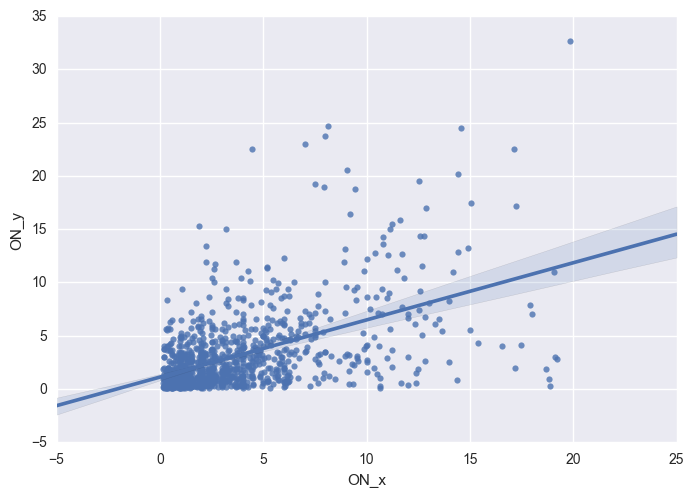

In [174]:
sns.regplot(x='ON_x', y="ON_y", data=df_tod1_2_clipped);

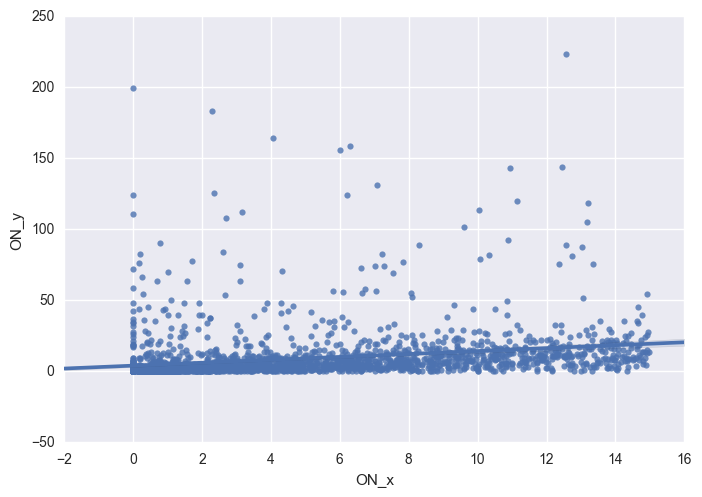

In [175]:
sns.regplot(x='ON_x', y="ON_y", data=df_tod2_2_clipped);

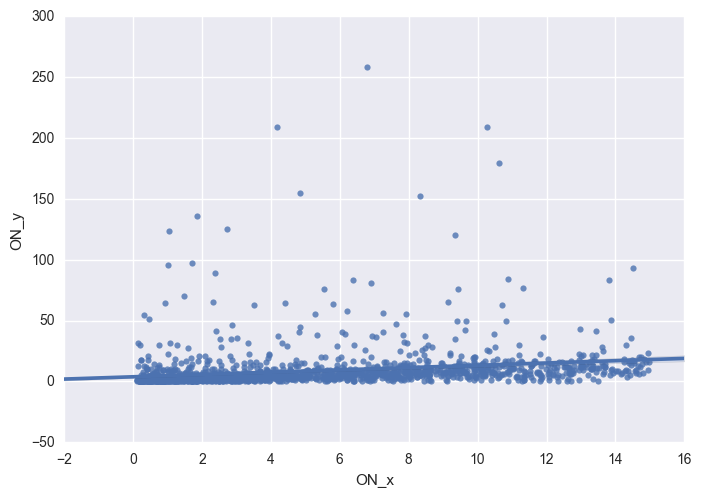

In [176]:
sns.regplot(x='ON_x', y="ON_y", data=df_tod3_2_clipped);

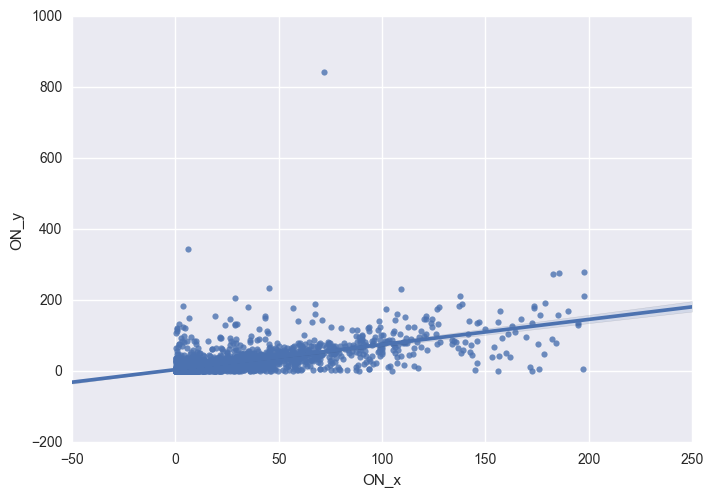

In [177]:
sns.regplot(x='ON_x', y="ON_y", data=df_tod4_2_clipped);

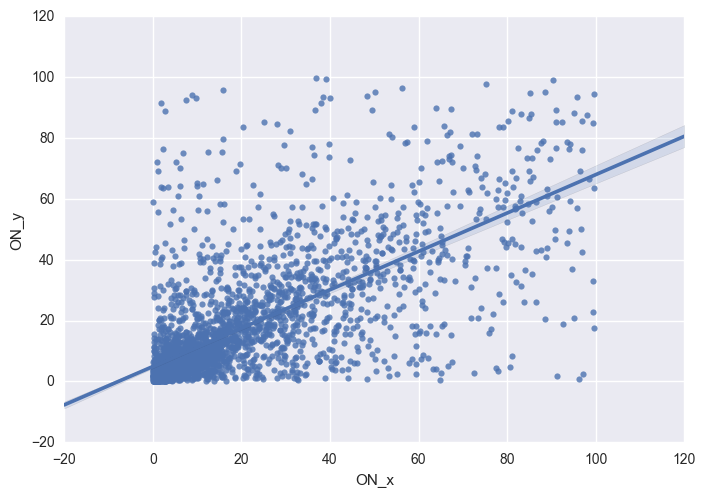

In [178]:
sns.regplot(x='ON_x', y="ON_y", data=df_tod5_2_clipped);

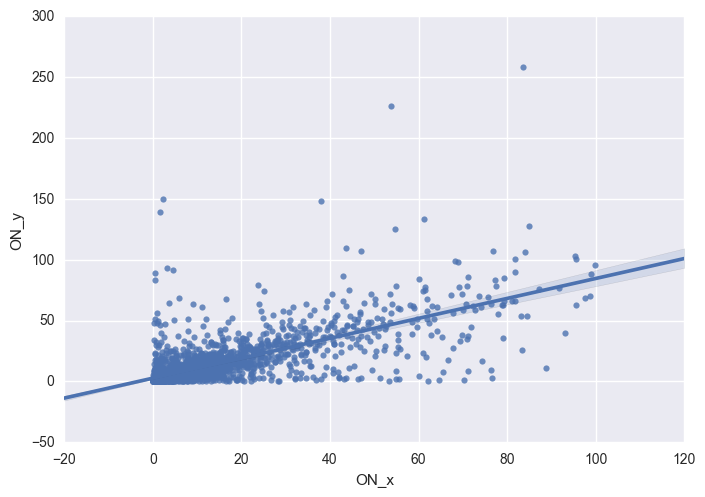

In [179]:
sns.regplot(x='ON_x', y="ON_y", data=df_tod6_2_clipped);

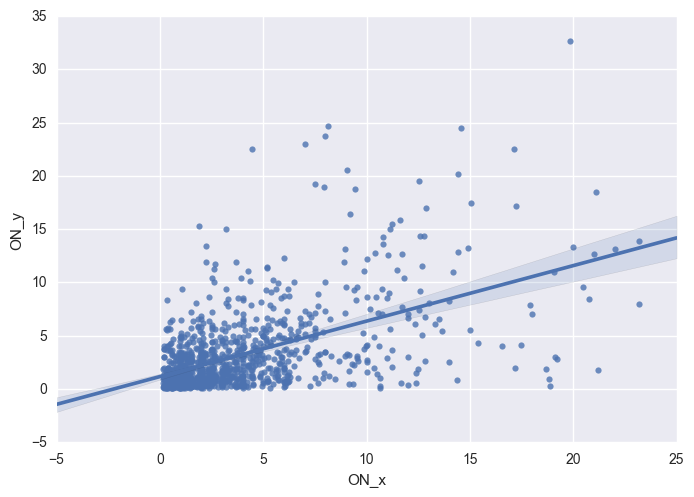

In [180]:
sns.regplot(x='ON_x', y="ON_y", data=df_tod7_2_clipped);

In [181]:
lm = smf.ols(formula = 'ON_x ~ ON_y', data = df_tod7_2_clipped).fit()

In [182]:
lm.params

Intercept   2.04
ON_y        0.56
dtype: float64

# Stop TOD

In [183]:
df_stop = store.get('stop_tod')

In [147]:
df_stop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1125515 entries, 0 to 1125514
Data columns (total 52 columns):
MONTH                 1125515 non-null datetime64[ns]
DOW                   1125515 non-null int64
TOD                   1125515 non-null object
AGENCY_ID             1125515 non-null object
STOP_ID               1125515 non-null int64
NUMDAYS               1125515 non-null int64
OBSDAYS               1125515 non-null int64
TRIP_STOPS            1125515 non-null int64
OBS_TRIP_STOPS        1125515 non-null int64
WGT_TRIP_STOPS        1110867 non-null float64
HEADWAY_S             1099357 non-null float64
FARE                  1125515 non-null float64
STOPNAME              1125515 non-null object
STOPNAME_AVL          1125515 non-null object
STOP_LAT              1125515 non-null float64
STOP_LON              1125515 non-null float64
EOL                   1125515 non-null int64
SOL                   1125515 non-null int64
TIMEPOINT             1104115 non-null float64
ARRIVAL

In [22]:
df_stop_tod1 = df_stop[df_stop['TOD'] == '0300-0559']
df_stop_tod1_sep09 = df_stop_tod1[df_stop_tod1['MONTH'] == '2009-09-01T00:00:00.000000000'] 
df_stop_tod1_sep13 = df_stop_tod1[df_stop_tod1['MONTH'] ==  '2013-09-01T00:00:00.000000000'] 
print(df_stop_tod1_sep09.ON.sum())
print(df_stop_tod1_sep13.ON.sum())

NameError: name 'df_stop' is not defined

In [23]:
df_stop_tod2 = df_stop[df_stop['TOD'] == '0600-0859']
df_stop_tod2_sep09 = df_stop_tod2[df_stop_tod2['MONTH'] == '2009-09-01T00:00:00.000000000'] 
df_stop_tod2_sep13 = df_stop_tod2[df_stop_tod2['MONTH'] ==  '2013-09-01T00:00:00.000000000'] 
print(df_stop_tod2_sep09.ON.sum())
print(df_stop_tod2_sep13.ON.sum())

NameError: name 'df_stop' is not defined

In [24]:
df_stop_tod3= df_stop[df_stop['TOD'] == '0900-1359']
df_stop_tod3_sep09 = df_stop_tod3[df_stop_tod3['MONTH'] == '2009-09-01T00:00:00.000000000'] 
df_stop_tod3_sep13 = df_stop_tod3[df_stop_tod3['MONTH'] ==  '2013-09-01T00:00:00.000000000'] 
print(df_stop_tod3_sep09.ON.sum())
print(df_stop_tod3_sep13.ON.sum())

NameError: name 'df_stop' is not defined

In [25]:
df_stop_tod4= df_stop[df_stop['TOD'] == '1400-1559']
df_stop_tod4_sep09 = df_stop_tod4[df_stop_tod4['MONTH'] == '2009-10-01T00:00:00.000000000'] 
df_stop_tod4_sep13 = df_stop_tod4[df_stop_tod4['MONTH'] ==  '2013-10-01T00:00:00.000000000'] 
print(df_stop_tod4_sep09.ON.sum())
print(df_stop_tod4_sep13.ON.sum())

NameError: name 'df_stop' is not defined

In [26]:
df_stop_tod5= df_stop[df_stop['TOD'] == '1600-1859']
df_stop_tod5_sep09 = df_stop_tod5[df_stop_tod5['MONTH'] == '2009-09-01T00:00:00.000000000'] 
df_stop_tod5_sep13 = df_stop_tod5[df_stop_tod5['MONTH'] ==  '2013-09-01T00:00:00.000000000'] 
print(df_stop_tod5_sep09.ON.sum())
print(df_stop_tod5_sep13.ON.sum())

NameError: name 'df_stop' is not defined

In [157]:
df_stop_tod6= df_stop[df_stop['TOD'] == '1900-2159']
df_stop_tod6_sep09 = df_stop_tod6[df_stop_tod6['MONTH'] == '2009-09-01T00:00:00.000000000'] 
df_stop_tod6_sep13 = df_stop_tod6[df_stop_tod6['MONTH'] ==  '2013-09-01T00:00:00.000000000'] 
print(df_stop_tod6_sep09.ON.sum())
print(df_stop_tod6_sep13.ON.sum())

34931.58376252011
37049.960092520574


In [158]:
df_stop_tod7= df_stop[df_stop['TOD'] == '2200-0259']
df_stop_tod7_sep09 = df_stop_tod7[df_stop_tod7['MONTH'] == '2009-09-01T00:00:00.000000000'] 
df_stop_tod7_sep13 = df_stop_tod7[df_stop_tod7['MONTH'] ==  '2013-09-01T00:00:00.000000000'] 
print(df_stop_tod7_sep09.ON.sum())
print(df_stop_tod7_sep13.ON.sum())

17416.548811927856
16364.497294473143


In [161]:
df_stop_tod1_sep09.head()

,MONTH,DOW,TOD,AGENCY_ID,STOP_ID,NUMDAYS,OBSDAYS,TRIP_STOPS,OBS_TRIP_STOPS,WGT_TRIP_STOPS,HEADWAY_S,FARE,STOPNAME,STOPNAME_AVL,STOP_LAT,STOP_LON,EOL,SOL,TIMEPOINT,ARRIVAL_TIME_DEV,DEPARTURE_TIME_DEV,DWELL_S,DWELL,RUNTIME_S,RUNTIME,TOTTIME_S,TOTTIME,SERVMILES_S,SERVMILES,RUNSPEED_S,RUNSPEED,TOTSPEED_S,TOTSPEED,ONTIME5,ON,OFF,LOAD_ARR,LOAD_DEP,PASSMILES,PASSHOURS,WAITHOURS,FULLFARE_REV,PASSDELAY_DEP,PASSDELAY_ARR,RDBRDNGS,DOORCYCLES,WHEELCHAIR,BIKERACK,CAPACITY,VC,CROWDED,CROWDHOURS
90212,2009-10-01,1,0300-0559,SFMTA,390,22,8,11,0,8.03,16.86,2.00,19th Avenue & Holloway St,19TH AVE&HOLLOWAY AVE NE-,37.72,-122.48,0,0,1.00,1.60,1.88,0.00,2.38,16.13,2.76,16.13,5.14,0.85,0.54,3.17,11.73,3.17,6.31,0.61,3.61,12.11,56.47,47.97,4.91,0.68,0.40,7.22,10.40,9.69,0.00,9.01,0.00,0.00,126.00,0.18,0.00,0.00
90213,2009-10-01,1,0300-0559,SFMTA,392,22,2,3,0,2.98,15.00,2.00,19TH AVE & LINCOLN WAY,19TH AVE & LINCOLN WAY SE,37.77,-122.48,0,0,1.00,-0.39,-0.22,0.00,0.49,2.10,1.41,2.10,1.90,0.36,0.36,10.29,15.16,10.29,11.25,0.50,0.00,1.49,23.80,22.32,2.86,0.28,0.00,0.00,0.00,0.00,0.00,2.98,0.00,0.00,63.00,0.13,0.00,0.00
90214,2009-10-01,1,0300-0559,SFMTA,660,22,1,4,0,5.02,13.00,2.00,MISSION ST & OCEAN AVENUE,MISSION ST&OCEAN AVE -MI/,37.72,-122.44,0,0,1.00,0.15,0.15,0.00,0.00,0.72,2.36,0.72,2.36,0.11,0.14,9.33,3.57,9.33,3.57,1.00,0.00,0.00,5.02,5.02,0.14,0.04,nan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,94.00,0.01,0.00,0.00
90215,2009-10-01,1,0300-0559,SFMTA,3001,22,3,1,0,1.00,nan,2.00,1st St & Howard St,1ST ST&HOWARD ST E-MB/SI,37.79,-122.40,0,0,1.00,1.72,1.72,0.00,0.00,0.57,0.88,0.57,0.88,0.07,0.07,7.16,4.64,7.16,4.64,1.00,0.00,0.00,3.33,3.33,0.23,0.05,nan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,63.00,0.05,0.00,0.00
90216,2009-10-01,1,0300-0559,SFMTA,3003,22,2,3,0,3.00,15.00,2.00,2nd St & Brannan St,2ND ST&BRANNAN ST E-NS/BZ,37.78,-122.39,0,0,0.00,9.43,9.43,0.00,0.00,1.59,0.80,1.59,0.80,0.29,0.29,10.98,21.96,10.98,21.96,0.00,0.00,0.00,16.50,16.50,1.60,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,63.00,0.09,0.00,0.00


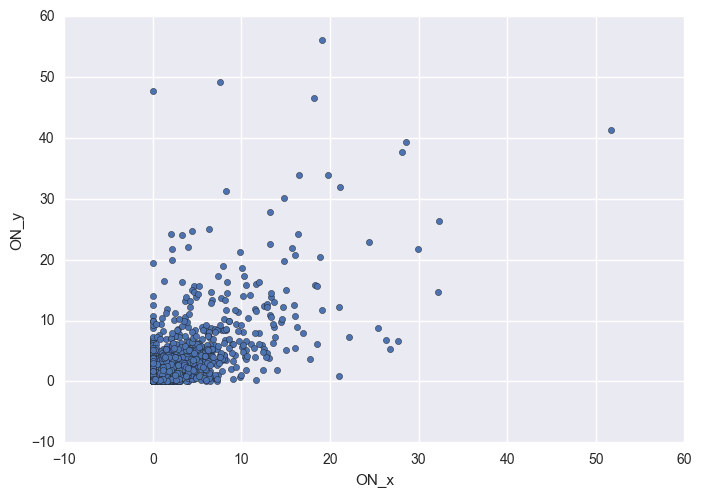

In [164]:
df_stop_tod1_2 = df_stop_tod1_sep09.merge(df_stop_tod1_sep13, on = ['DOW','TOD','AGENCY_ID','STOP_ID'])
df_stop_tod1_2.plot.scatter(x = 'ON_x', y = 'ON_y')

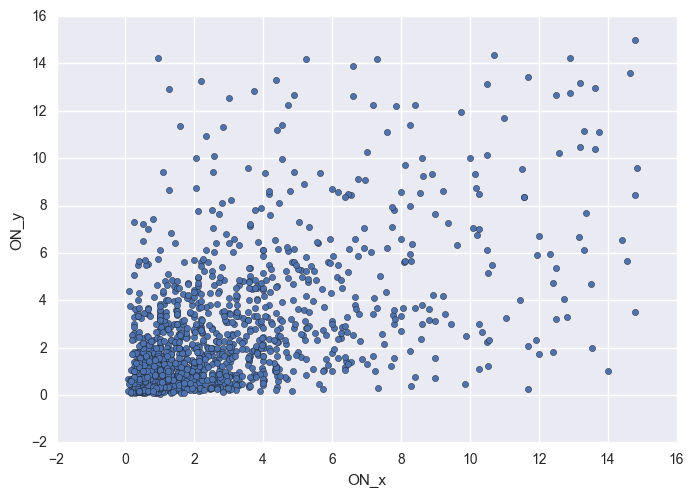

In [269]:
df_stop_tod1_2 = df_stop_tod1_sep09.merge(df_tod1_sep13, on = ['DOW','TOD','AGENCY_ID','STOP_ID'])

df_stop_tod1_2_clipped = df_stop_tod1_2.loc[df_stop_tod1_2['ON_x'] < 15]
df_stop_tod1_2_clipped = df_stop_tod1_2_clipped.loc[df_stop_tod1_2['ON_y'] < 15]
df_stop_tod1_2_clipped = df_stop_tod1_2_clipped.loc[df_stop_tod1_2['ON_x'] > 0]
df_stop_tod1_2_clipped = df_stop_tod1_2_clipped.loc[df_stop_tod1_2['ON_y'] > 0]

df_stop_tod1_2_clipped.plot.scatter(x = 'ON_x', y = 'ON_y')

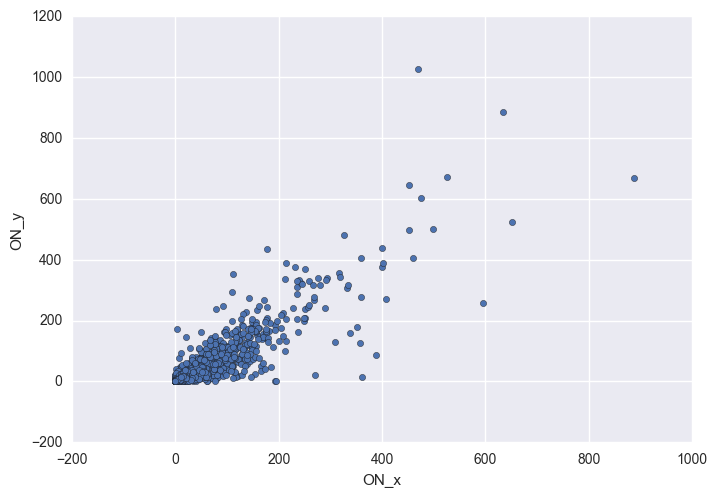

In [201]:
df_stop_tod2_2 = df_stop_tod2_sep09.merge(df_stop_tod2_sep13, on = ['DOW','TOD','AGENCY_ID','STOP_ID'])
df_stop_tod2_2.plot.scatter(x = 'ON_x', y = 'ON_y')

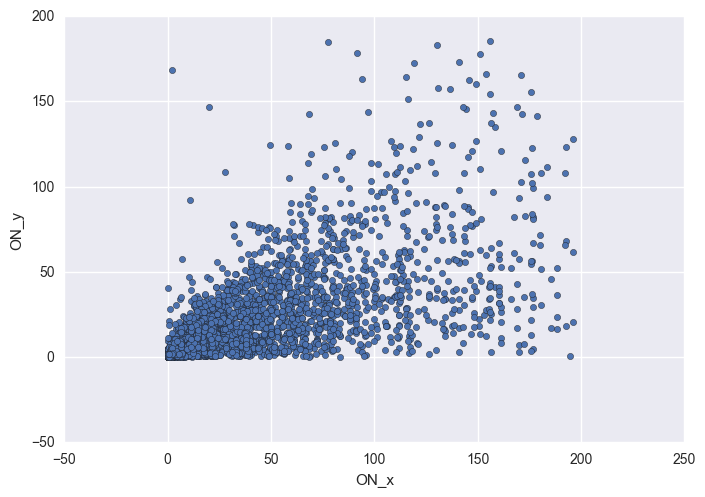

In [268]:
df_stop_tod2_2 = df_stop_tod2_sep09.merge(df_tod2_sep13, on = ['DOW','TOD','AGENCY_ID','STOP_ID'])

df_stop_tod2_2_clipped = df_stop_tod2_2.loc[df_stop_tod2_2['ON_x'] < 200]
df_stop_tod2_2_clipped = df_stop_tod2_2_clipped.loc[df_stop_tod2_2['ON_y'] < 200]
df_stop_tod2_2_clipped = df_stop_tod2_2_clipped.loc[df_stop_tod2_2['ON_x'] > 0]
df_stop_tod2_2_clipped = df_stop_tod2_2_clipped.loc[df_stop_tod2_2['ON_y'] > 0]

df_stop_tod2_2_clipped.plot.scatter(x = 'ON_x', y = 'ON_y')

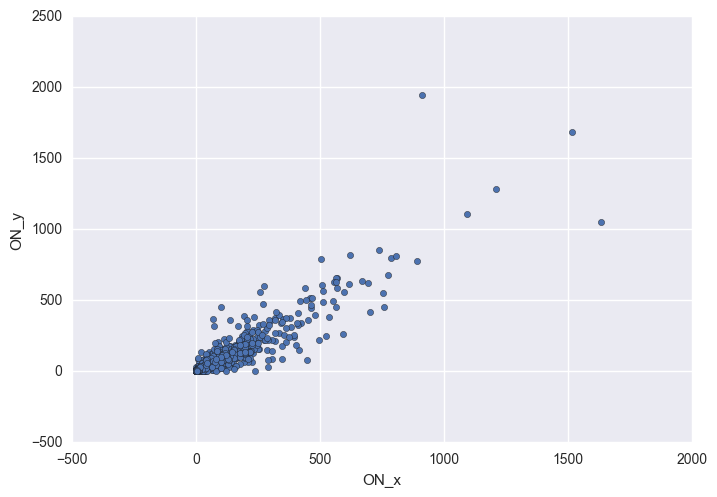

In [203]:
df_stop_tod3_2 = df_stop_tod3_sep09.merge(df_stop_tod3_sep13, on = ['DOW','TOD','AGENCY_ID','STOP_ID'])
df_stop_tod3_2.plot.scatter(x = 'ON_x', y = 'ON_y')

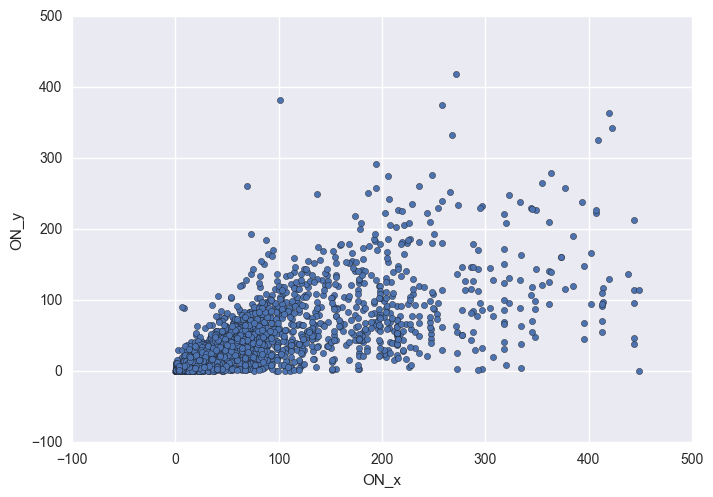

In [267]:
df_stop_tod3_2 = df_stop_tod3_sep09.merge(df_tod3_sep13, on = ['DOW','TOD','AGENCY_ID','STOP_ID'])

df_stop_tod3_2_clipped = df_stop_tod3_2.loc[df_stop_tod3_2['ON_x'] < 450]
df_stop_tod3_2_clipped = df_stop_tod3_2_clipped.loc[df_stop_tod3_2['ON_y'] < 450]
df_stop_tod3_2_clipped = df_stop_tod3_2_clipped.loc[df_stop_tod3_2['ON_x'] > 0]
df_stop_tod3_2_clipped = df_stop_tod3_2_clipped.loc[df_stop_tod3_2['ON_y'] > 0]

df_stop_tod3_2_clipped.plot.scatter(x = 'ON_x', y = 'ON_y')

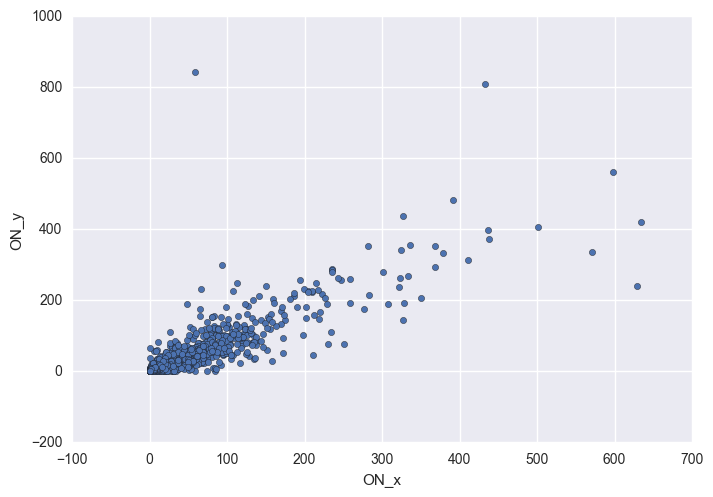

In [207]:
df_stop_tod4_2 = df_stop_tod4_sep09.merge(df_stop_tod4_sep13, on = ['DOW','TOD','AGENCY_ID','STOP_ID'])
df_stop_tod4_2.plot.scatter(x = 'ON_x', y = 'ON_y')

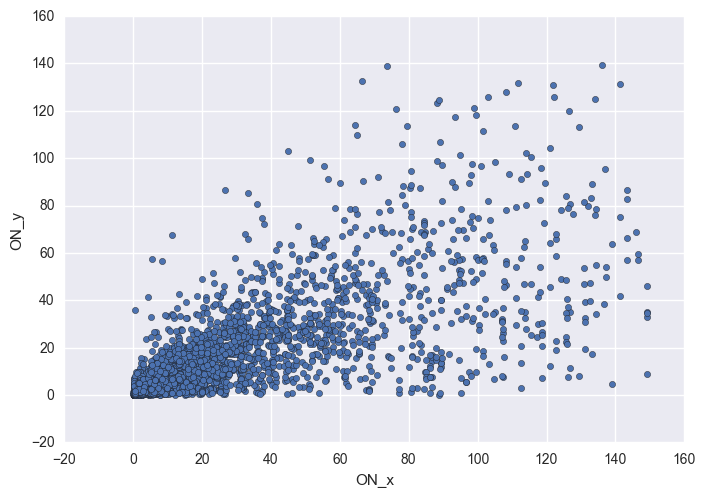

In [266]:
df_stop_tod4_2 = df_stop_tod4_sep09.merge(df_tod4_sep13, on = ['DOW','TOD','AGENCY_ID','STOP_ID'])

df_stop_tod4_2_clipped = df_stop_tod4_2.loc[df_stop_tod4_2['ON_x'] < 150]
df_stop_tod4_2_clipped = df_stop_tod4_2_clipped.loc[df_stop_tod4_2['ON_y'] < 150]
df_stop_tod4_2_clipped = df_stop_tod4_2_clipped.loc[df_stop_tod4_2['ON_x'] > 0]
df_stop_tod4_2_clipped = df_stop_tod4_2_clipped.loc[df_stop_tod4_2['ON_y'] > 0]

df_stop_tod4_2_clipped.plot.scatter(x = 'ON_x', y = 'ON_y')

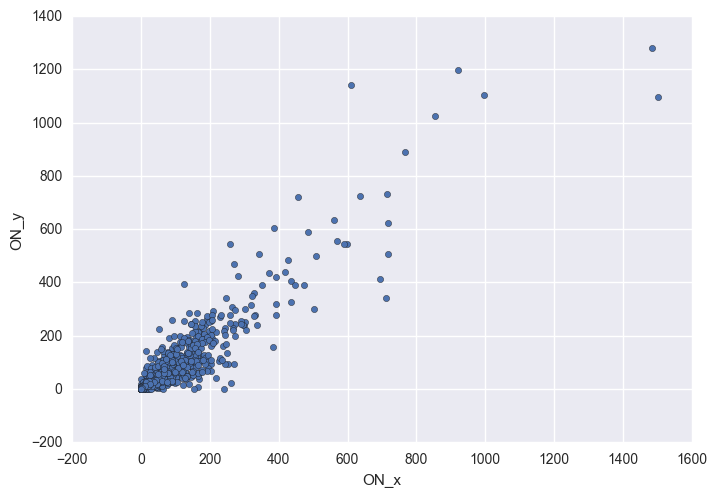

In [209]:
df_stop_tod5_2 = df_stop_tod5_sep09.merge(df_stop_tod5_sep13, on = ['DOW','TOD','AGENCY_ID','STOP_ID'])
df_stop_tod5_2.plot.scatter(x = 'ON_x', y = 'ON_y')

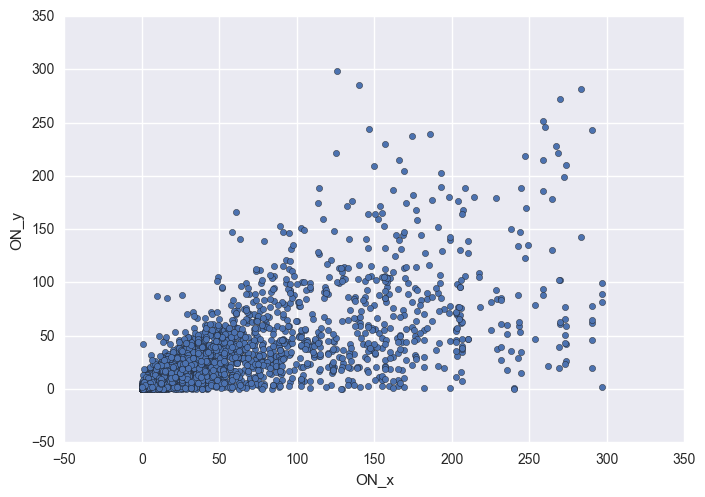

In [265]:
df_stop_tod5_2 = df_stop_tod5_sep09.merge(df_tod5_sep13, on = ['DOW','TOD','AGENCY_ID','STOP_ID'])

df_stop_tod5_2_clipped = df_stop_tod5_2.loc[df_stop_tod5_2['ON_x'] < 300]
df_stop_tod5_2_clipped = df_stop_tod5_2_clipped.loc[df_stop_tod5_2['ON_y'] < 300]
df_stop_tod5_2_clipped = df_stop_tod5_2_clipped.loc[df_stop_tod5_2['ON_x'] > 0]
df_stop_tod5_2_clipped = df_stop_tod5_2_clipped.loc[df_stop_tod5_2['ON_y'] > 0]

df_stop_tod5_2_clipped.plot.scatter(x = 'ON_x', y = 'ON_y')

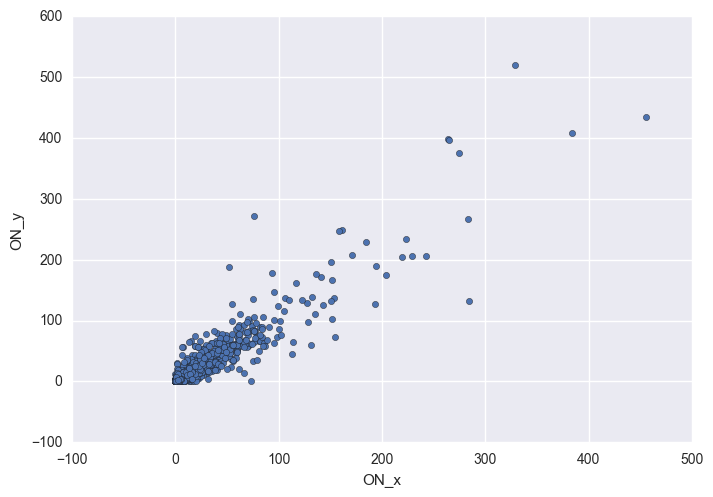

In [211]:
df_stop_tod6_2 = df_stop_tod6_sep09.merge(df_stop_tod6_sep13, on = ['DOW','TOD','AGENCY_ID','STOP_ID'])
df_stop_tod6_2.plot.scatter(x = 'ON_x', y = 'ON_y')

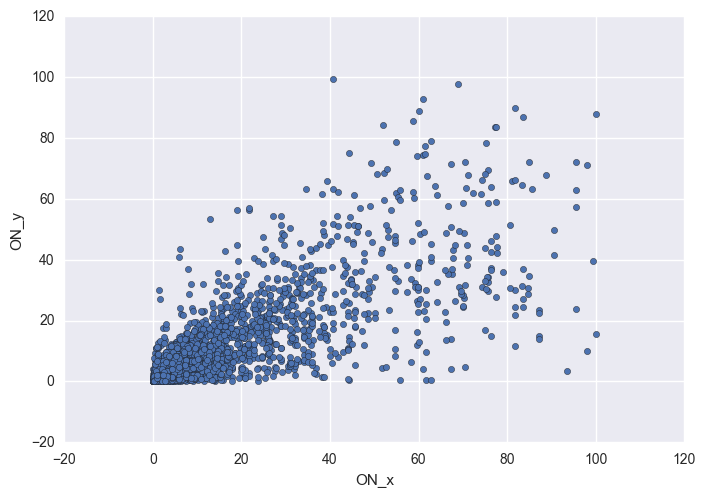

In [263]:
df_stop_tod6_2 = df_stop_tod6_sep09.merge(df_tod6_sep13, on = ['DOW','TOD','AGENCY_ID','STOP_ID'])

df_stop_tod6_2_clipped = df_stop_tod6_2.loc[df_stop_tod6_2['ON_x'] < 100]
df_stop_tod6_2_clipped = df_stop_tod6_2_clipped.loc[df_stop_tod6_2['ON_y'] < 100]
df_stop_tod6_2_clipped = df_stop_tod6_2_clipped.loc[df_stop_tod6_2['ON_x'] > 0]
df_stop_tod6_2_clipped = df_stop_tod6_2_clipped.loc[df_stop_tod6_2['ON_y'] > 0]

df_stop_tod6_2_clipped.plot.scatter(x = 'ON_x', y = 'ON_y')

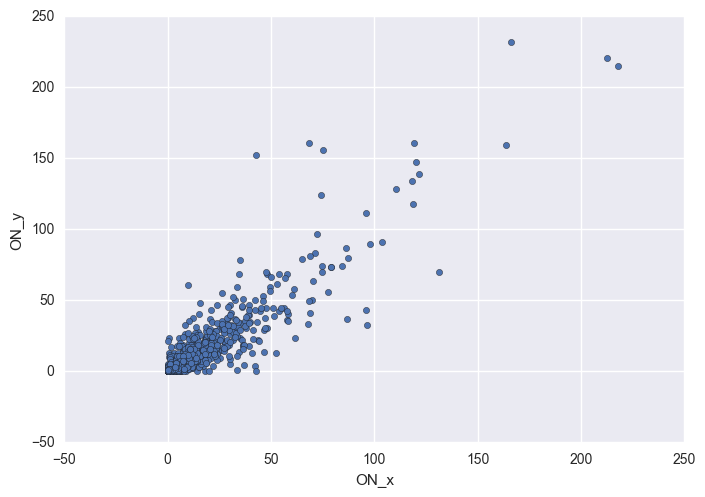

In [213]:
df_stop_tod7_2 = df_stop_tod7_sep09.merge(df_stop_tod7_sep13, on = ['DOW','TOD','AGENCY_ID','STOP_ID'])
df_stop_tod7_2.plot.scatter(x = 'ON_x', y = 'ON_y')

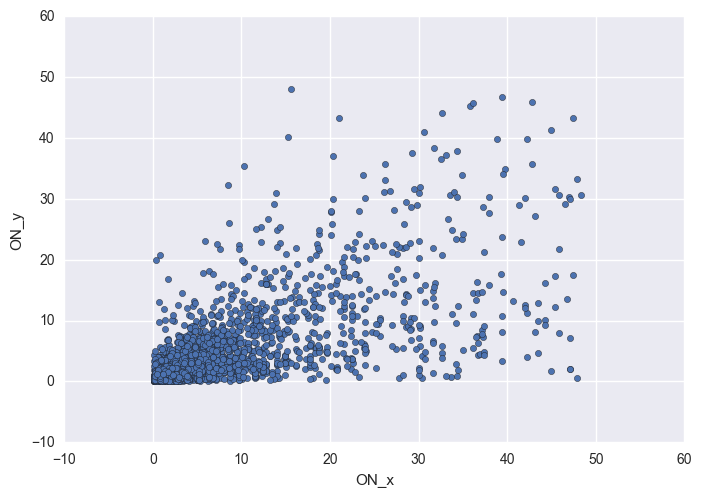

In [264]:
df_stop_tod7_2 = df_stop_tod7_sep09.merge(df_tod7_sep13, on = ['DOW','TOD','AGENCY_ID','STOP_ID'])

df_stop_tod7_2_clipped = df_stop_tod7_2.loc[df_stop_tod7_2['ON_x'] < 50]
df_stop_tod7_2_clipped = df_stop_tod7_2_clipped.loc[df_stop_tod7_2['ON_y'] < 50]
df_stop_tod7_2_clipped = df_stop_tod7_2_clipped.loc[df_stop_tod7_2['ON_x'] > 0]
df_stop_tod7_2_clipped = df_stop_tod7_2_clipped.loc[df_stop_tod7_2['ON_y'] > 0]

df_stop_tod7_2_clipped.plot.scatter(x = 'ON_x', y = 'ON_y')

# Day 

In [36]:
df_stopd = store.get('stop_day')

In [37]:
df_stopd.head()

,MONTH,DOW,AGENCY_ID,STOP_ID,NUMDAYS,OBSDAYS,TRIP_STOPS,OBS_TRIP_STOPS,WGT_TRIP_STOPS,HEADWAY_S,FARE,STOPNAME,STOPNAME_AVL,STOP_LAT,STOP_LON,EOL,SOL,TIMEPOINT,ARRIVAL_TIME_DEV,DEPARTURE_TIME_DEV,DWELL_S,DWELL,RUNTIME_S,RUNTIME,TOTTIME_S,TOTTIME,SERVMILES_S,SERVMILES,RUNSPEED_S,RUNSPEED,TOTSPEED_S,TOTSPEED,ONTIME5,ON,OFF,LOAD_ARR,LOAD_DEP,PASSMILES,PASSHOURS,WAITHOURS,FULLFARE_REV,PASSDELAY_DEP,PASSDELAY_ARR,RDBRDNGS,DOORCYCLES,WHEELCHAIR,BIKERACK,CAPACITY,VC,CROWDED,CROWDHOURS
0,2009-06-01,1,SFMTA,390,12,12,306,51,277.74,21.80,2.00,19th Avenue & Holloway St,19TH AVE&HOLLOWAY AVE NE-,37.72,-122.48,0,0,1.00,0.68,1.21,0.00,92.67,274.72,156.73,274.72,249.40,29.40,27.99,6.42,10.71,6.42,6.73,0.65,926.61,"1,115.00","4,835.29","4,646.90",545.09,80.37,111.27,"1,853.21","1,821.33","1,490.38",0.00,446.85,0.00,0.00,"3,260.25",0.28,0.02,6.23
1,2009-06-01,1,SFMTA,392,12,12,121,17,113.26,14.23,2.00,19TH AVE & LINCOLN WAY,19TH AVE & LINCOLN WAY SE,37.77,-122.48,0,0,1.00,2.20,2.49,0.00,33.56,85.30,67.72,85.30,101.29,14.52,13.59,10.21,12.04,10.21,8.05,0.60,303.86,146.45,"2,588.02","2,745.42",310.56,41.12,28.37,607.71,"1,031.10",929.83,0.00,161.83,0.00,0.58,"1,092.00",0.35,0.02,2.32
2,2009-06-01,1,SFMTA,660,12,12,134,27,136.42,9.33,2.00,MISSION ST & OCEAN AVENUE,MISSION ST&OCEAN AVE -MI/,37.72,-122.44,0,0,1.00,1.28,1.28,0.00,0.55,36.54,79.16,36.54,79.71,3.76,3.82,6.18,2.90,6.18,2.88,0.77,3.05,6.86,"1,214.61","1,210.80",34.01,12.53,0.15,6.10,5.81,5.05,0.00,1.64,0.00,0.28,"2,582.42",0.10,0.00,0.00
3,2009-06-01,1,SFMTA,913,12,8,91,10,78.58,24.69,2.00,DUBLIN ST & LAGRANDE AVE,DUBLIN ST&LAGRANDE AVE S - EOL,37.72,-122.43,1,0,1.00,3.32,3.65,0.00,0.00,32.83,51.44,32.83,51.44,5.06,4.40,9.25,5.14,9.25,5.14,0.71,24.91,13.80,103.17,114.28,7.51,1.16,4.35,49.81,98.69,90.40,0.69,56.56,0.00,1.00,984.38,0.02,0.00,0.00
4,2009-06-01,1,SFMTA,3001,12,11,63,12,63.00,12.87,2.00,1st St & Howard St,1ST ST&HOWARD ST E-MB/SI,37.79,-122.40,0,0,1.00,2.73,2.74,0.00,0.68,43.61,57.82,43.61,58.50,4.28,4.28,5.89,4.45,5.89,4.39,0.70,11.48,3.00,"1,267.71","1,276.19",86.20,21.22,1.12,22.97,43.12,40.54,0.00,4.24,0.74,0.00,882.00,0.32,0.02,1.72


In [41]:
df_stopd_sep09 = df_stopd[df_stopd['MONTH'] == '2009-09-01T00:00:00.000000000'] 
df_stopd_sep13 = df_stopd[df_stopd['MONTH'] ==  '2013-09-01T00:00:00.000000000'] 

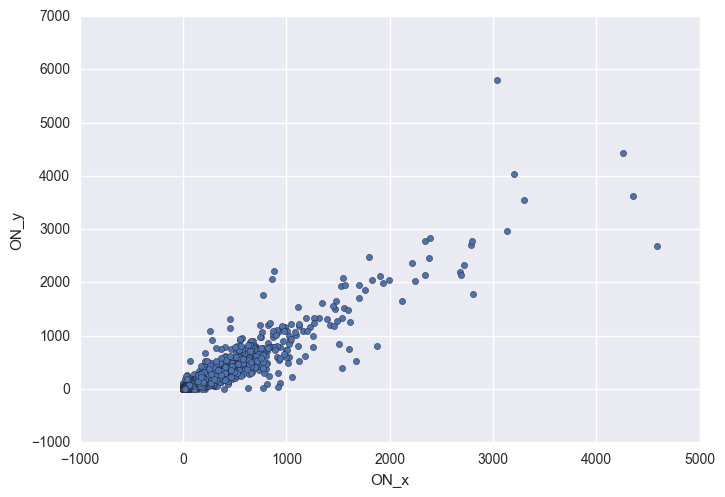

In [42]:
df_stopd_2 = df_stopd_sep09.merge(df_stopd_sep13, on = ['DOW','AGENCY_ID','STOP_ID'])
df_stopd_2.plot.scatter(x = 'ON_x', y = 'ON_y',style=['o','rx'])

In [43]:
lm = smf.ols(formula = 'ON_x ~ ON_y', data = df_stopd_2).fit()
print(lm.params)
lm.pvalues


Intercept   23.02
ON_y         0.92
dtype: float64


Intercept   0.00
ON_y        0.00
dtype: float64

In [237]:
df_stopd.head()

,MONTH,DOW,AGENCY_ID,STOP_ID,NUMDAYS,OBSDAYS,TRIP_STOPS,OBS_TRIP_STOPS,WGT_TRIP_STOPS,HEADWAY_S,FARE,STOPNAME,STOPNAME_AVL,STOP_LAT,STOP_LON,EOL,SOL,TIMEPOINT,ARRIVAL_TIME_DEV,DEPARTURE_TIME_DEV,DWELL_S,DWELL,RUNTIME_S,RUNTIME,TOTTIME_S,TOTTIME,SERVMILES_S,SERVMILES,RUNSPEED_S,RUNSPEED,TOTSPEED_S,TOTSPEED,ONTIME5,ON,OFF,LOAD_ARR,LOAD_DEP,PASSMILES,PASSHOURS,WAITHOURS,FULLFARE_REV,PASSDELAY_DEP,PASSDELAY_ARR,RDBRDNGS,DOORCYCLES,WHEELCHAIR,BIKERACK,CAPACITY,VC,CROWDED,CROWDHOURS
0,2009-06-01,1,SFMTA,390,12,12,306,51,277.74,21.80,2.00,19th Avenue & Holloway St,19TH AVE&HOLLOWAY AVE NE-,37.72,-122.48,0,0,1.00,0.68,1.21,0.00,92.67,274.72,156.73,274.72,249.40,29.40,27.99,6.42,10.71,6.42,6.73,0.65,926.61,"1,115.00","4,835.29","4,646.90",545.09,80.37,111.27,"1,853.21","1,821.33","1,490.38",0.00,446.85,0.00,0.00,"3,260.25",0.28,0.02,6.23
1,2009-06-01,1,SFMTA,392,12,12,121,17,113.26,14.23,2.00,19TH AVE & LINCOLN WAY,19TH AVE & LINCOLN WAY SE,37.77,-122.48,0,0,1.00,2.20,2.49,0.00,33.56,85.30,67.72,85.30,101.29,14.52,13.59,10.21,12.04,10.21,8.05,0.60,303.86,146.45,"2,588.02","2,745.42",310.56,41.12,28.37,607.71,"1,031.10",929.83,0.00,161.83,0.00,0.58,"1,092.00",0.35,0.02,2.32
2,2009-06-01,1,SFMTA,660,12,12,134,27,136.42,9.33,2.00,MISSION ST & OCEAN AVENUE,MISSION ST&OCEAN AVE -MI/,37.72,-122.44,0,0,1.00,1.28,1.28,0.00,0.55,36.54,79.16,36.54,79.71,3.76,3.82,6.18,2.90,6.18,2.88,0.77,3.05,6.86,"1,214.61","1,210.80",34.01,12.53,0.15,6.10,5.81,5.05,0.00,1.64,0.00,0.28,"2,582.42",0.10,0.00,0.00
3,2009-06-01,1,SFMTA,913,12,8,91,10,78.58,24.69,2.00,DUBLIN ST & LAGRANDE AVE,DUBLIN ST&LAGRANDE AVE S - EOL,37.72,-122.43,1,0,1.00,3.32,3.65,0.00,0.00,32.83,51.44,32.83,51.44,5.06,4.40,9.25,5.14,9.25,5.14,0.71,24.91,13.80,103.17,114.28,7.51,1.16,4.35,49.81,98.69,90.40,0.69,56.56,0.00,1.00,984.38,0.02,0.00,0.00
4,2009-06-01,1,SFMTA,3001,12,11,63,12,63.00,12.87,2.00,1st St & Howard St,1ST ST&HOWARD ST E-MB/SI,37.79,-122.40,0,0,1.00,2.73,2.74,0.00,0.68,43.61,57.82,43.61,58.50,4.28,4.28,5.89,4.45,5.89,4.39,0.70,11.48,3.00,"1,267.71","1,276.19",86.20,21.22,1.12,22.97,43.12,40.54,0.00,4.24,0.74,0.00,882.00,0.32,0.02,1.72


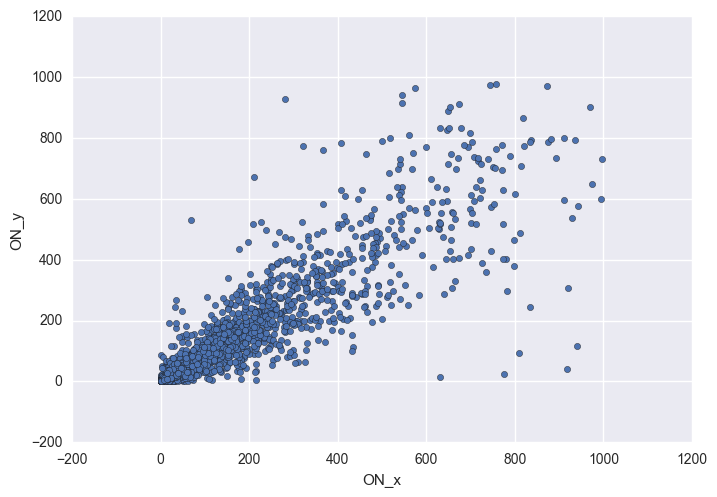

In [259]:
df_stopd_2 = df_stopd_sep09.merge(df_stopd_sep13, on = ['DOW','AGENCY_ID','STOP_ID'])

df_stopd_2_clipped = df_stopd_2.loc[df_stopd_2['ON_x'] < 1000]
df_stopd_2_clipped = df_stopd_2_clipped.loc[df_stopd_2['ON_y'] < 1000]
df_stopd_2_clipped = df_stopd_2_clipped.loc[df_stopd_2['ON_x'] > 0]
df_stopd_2_clipped = df_stopd_2_clipped.loc[df_stopd_2['ON_y'] > 0]

df_stopd_2_clipped.plot.scatter(x = 'ON_x', y = 'ON_y')

In [29]:
df_rs_day = store.get('rs_day')

In [30]:
df_rs_day.DOW.unique()

array([1], dtype=int64)

In [31]:
df_rs_day_sep09 = df_rs_day[df_rs_day['MONTH'] == '2009-09-01T00:00:00.000000000'] 
df_rs_day_sep13 = df_rs_day[df_rs_day['MONTH'] ==  '2013-09-01T00:00:00.000000000'] 

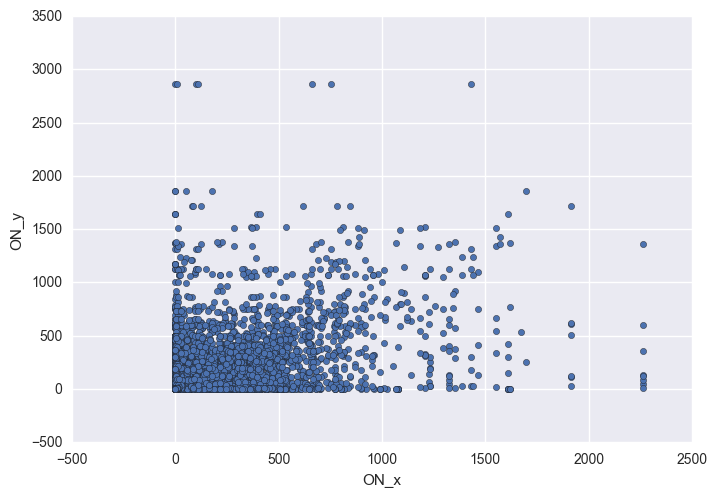

In [33]:
df_rs_day_2 = df_rs_day_sep09.merge(df_rs_day_sep13, on = ['DOW','AGENCY_ID','STOP_ID'])
df_rs_day_2.plot.scatter(x = 'ON_x', y = 'ON_y',style=['o','rx'])

In [34]:
lm = smf.ols(formula = 'ON_x ~ ON_y', data = df_rs_day_2).fit()
print(lm.params)
lm.pvalues


Intercept   58.68
ON_y         0.47
dtype: float64


Intercept   0.00
ON_y        0.00
dtype: float64

In [35]:
df_rs_day_2 = df_stopd_sep09.merge(df_stopd_sep13, on = ['DOW','AGENCY_ID','STOP_ID'])

df_rs_day_clipped = df_stopd_2.loc[df_stopd_2['ON_x'] < 1000]
df_stopd_2_clipped = df_stopd_2_clipped.loc[df_stopd_2['ON_y'] < 1000]


df_stopd_2_clipped.plot.scatter(x = 'ON_x', y = 'ON_y')

NameError: name 'df_stopd_sep09' is not defined